# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os 
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + "79f28f94968c33343aa84960a76e9c93"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naze
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | port blair
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | freetown
Processing Record 9 of Set 1 | medicine hat
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | fort mcmurray
Processing Record 12 of Set 1 | ta`u
Processing Record 13 of Set 1 | caleta de carquin
Processing Record 14 of Set 1 | buka
Processing Record 15 of Set 1 | beberibe
Processing Record 16 of Set 1 | weno
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | tromso
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | yellowknife
City not found. Skipping...
Processi

Processing Record 37 of Set 4 | kiunga
Processing Record 38 of Set 4 | kukmor
Processing Record 39 of Set 4 | badger
Processing Record 40 of Set 4 | savannah
Processing Record 41 of Set 4 | petoskey
Processing Record 42 of Set 4 | shihezi
Processing Record 43 of Set 4 | medyn'
Processing Record 44 of Set 4 | tolanaro
Processing Record 45 of Set 4 | queenstown
Processing Record 46 of Set 4 | chaoyang
Processing Record 47 of Set 4 | pangody
Processing Record 48 of Set 4 | machico
Processing Record 49 of Set 4 | coquimbo
Processing Record 0 of Set 5 | iskateley
Processing Record 1 of Set 5 | aripuana
Processing Record 2 of Set 5 | touros
Processing Record 3 of Set 5 | northam
Processing Record 4 of Set 5 | rongelap
Processing Record 5 of Set 5 | kuala tungkal
Processing Record 6 of Set 5 | saipan
Processing Record 7 of Set 5 | kyabe
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Set 5 | muynoq
Processing Record 10 of Set 5 | liman
Processing Record 11 of Set 5 | westport
Pr

Processing Record 28 of Set 8 | san patricio
Processing Record 29 of Set 8 | abu al matamir
Processing Record 30 of Set 8 | jianguang
Processing Record 31 of Set 8 | waingapu
Processing Record 32 of Set 8 | tome
Processing Record 33 of Set 8 | katsuren-haebaru
Processing Record 34 of Set 8 | igarka
Processing Record 35 of Set 8 | bratsk
Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | south boston
Processing Record 38 of Set 8 | tual
Processing Record 39 of Set 8 | nadym
Processing Record 40 of Set 8 | mangrol
Processing Record 41 of Set 8 | severo-yeniseyskiy
Processing Record 42 of Set 8 | labasa
Processing Record 43 of Set 8 | konarka
Processing Record 44 of Set 8 | mata-utu
Processing Record 45 of Set 8 | zakamensk
Processing Record 46 of Set 8 | gjirokaster
Processing Record 47 of Set 8 | linden
Processing Record 48 of Set 8 | laojunmiao
Processing Record 49 of Set 8 | alofi
Processing Record 0 of Set 9 | mahina
Processing Record 1 of Set 9 | hirara
Processin

Processing Record 19 of Set 12 | kusheriki
Processing Record 20 of Set 12 | zeya
Processing Record 21 of Set 12 | kuyeda
Processing Record 22 of Set 12 | aral
Processing Record 23 of Set 12 | kolno
Processing Record 24 of Set 12 | mhangura
Processing Record 25 of Set 12 | usogorsk
Processing Record 26 of Set 12 | amahai
Processing Record 27 of Set 12 | usinsk
Processing Record 28 of Set 12 | priargunsk
Processing Record 29 of Set 12 | sao jose da coroa grande
Processing Record 30 of Set 12 | ojai
Processing Record 31 of Set 12 | tazacorte
Processing Record 32 of Set 12 | mckinleyville
Processing Record 33 of Set 12 | kamwenge
-----------------------------
Data Retrieval Complete      
-----------------------------


In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,naze,28.3667,129.4833,20.51,64,99,6.47,JP,1701068449
1,grytviken,-54.2811,-36.5092,0.93,94,100,6.69,GS,1701068450
2,port blair,11.6667,92.7500,31.02,70,75,5.14,IN,1701068450
3,enewetak,11.3474,162.3373,28.03,81,10,9.91,MH,1701068450
4,margaret river,-33.9500,115.0667,20.17,69,100,6.61,AU,1701068450


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("python-api-challengeStarter_Codeoutput_data", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("python-api-challengeStarter_Codeoutput_data", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,20.51,64,99,6.47,JP,1701068449
1,grytviken,-54.2811,-36.5092,0.93,94,100,6.69,GS,1701068450
2,port blair,11.6667,92.7500,31.02,70,75,5.14,IN,1701068450
3,enewetak,11.3474,162.3373,28.03,81,10,9.91,MH,1701068450
4,margaret river,-33.9500,115.0667,20.17,69,100,6.61,AU,1701068450


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: 'Starter_Code/output_data.png'

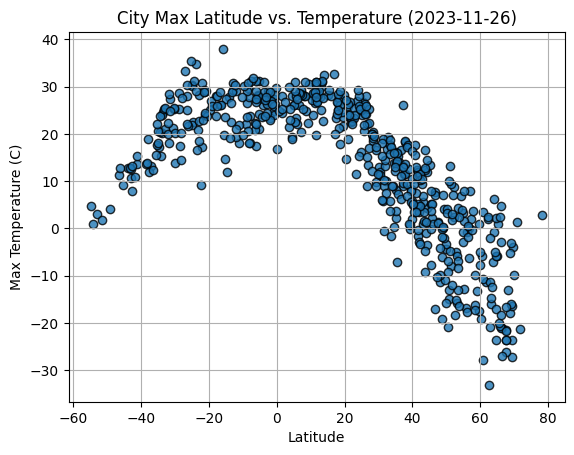

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Starter_Code/output_data")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

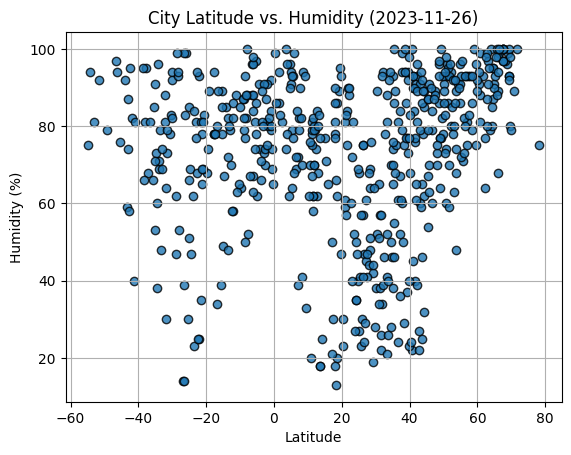

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

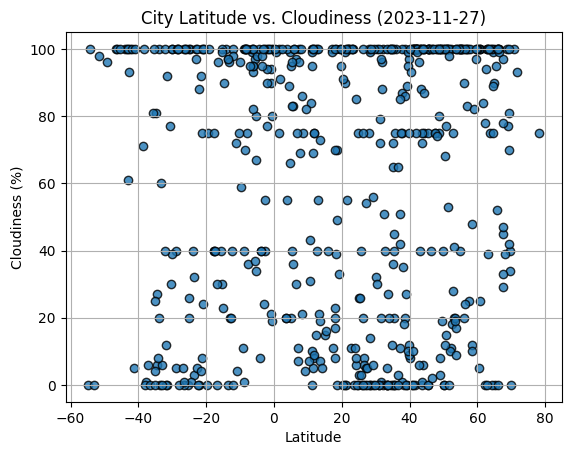

In [38]:
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

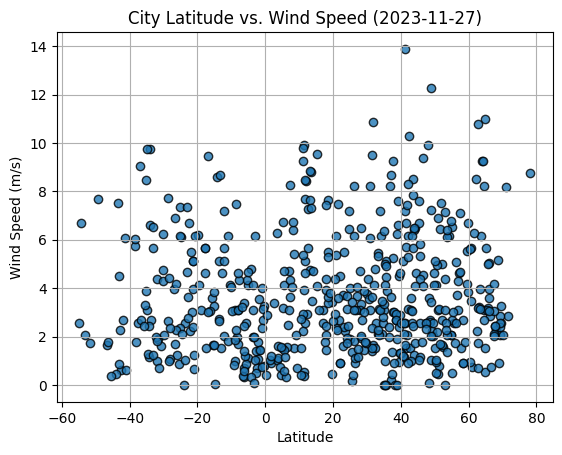

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,20.51,64,99,6.47,JP,1701068449
2,port blair,11.6667,92.7500,31.02,70,75,5.14,IN,1701068450
3,enewetak,11.3474,162.3373,28.03,81,10,9.91,MH,1701068450
5,whitehorse,60.7161,-135.0538,3.43,81,100,5.66,CA,1701068451
7,freetown,8.4840,-13.2299,24.84,94,75,1.54,SL,1701068451


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

In [45]:
 # Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,0.93,94,100,6.69,GS,1701068450
4,margaret river,-33.9500,115.0667,20.17,69,100,6.61,AU,1701068450
6,chonchi,-42.6128,-73.8092,7.84,95,100,0.60,CL,1701068451
9,avarua,-21.2078,-159.7750,24.03,78,100,5.14,CK,1701068452
11,ta`u,-14.2336,-169.5144,27.80,85,100,8.60,AS,1701068452


The r-value is: 0.4119088124064587


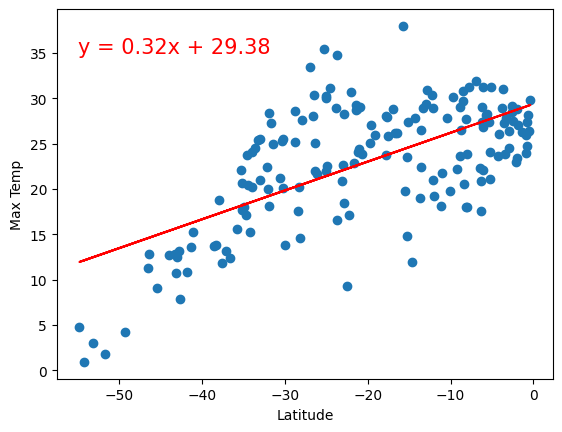

In [46]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11715303598057424


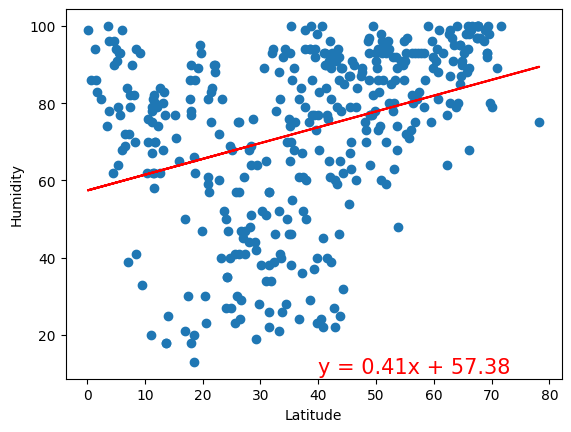

In [47]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.0002808747046324607


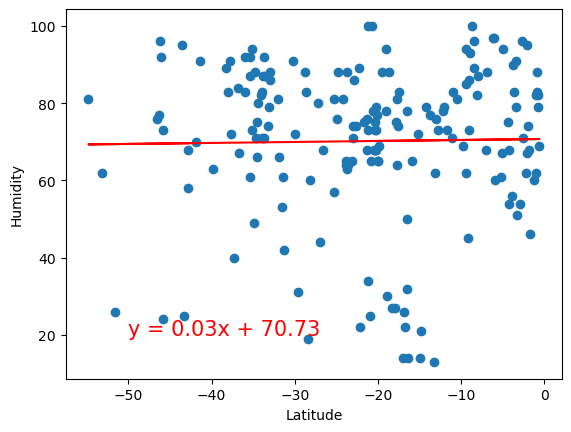

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01472390990258339


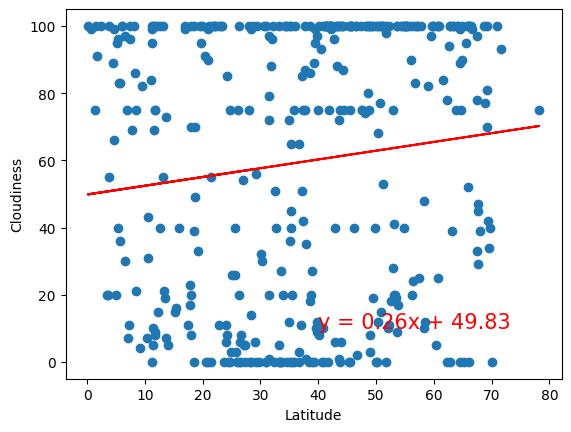

In [48]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.027585228539138824


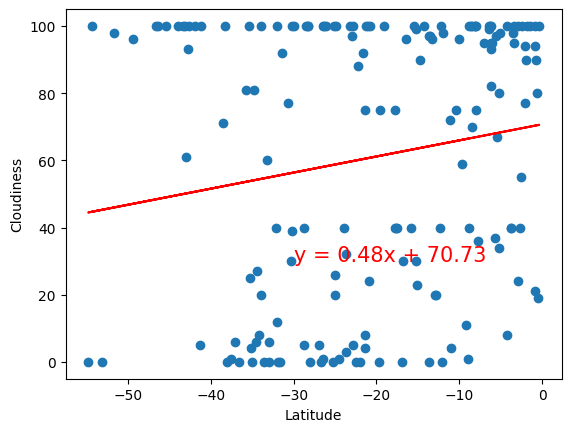

In [49]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0009153323075846049


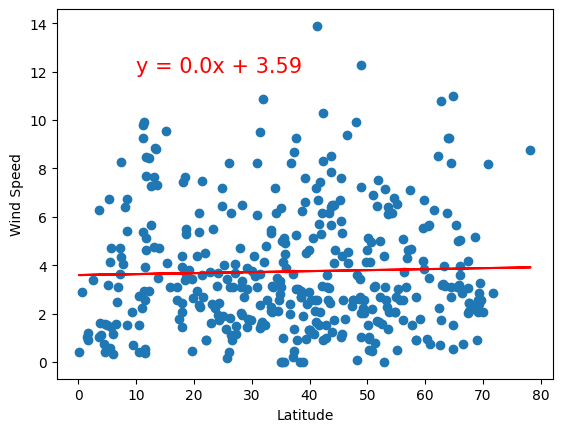

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.026540515777434395


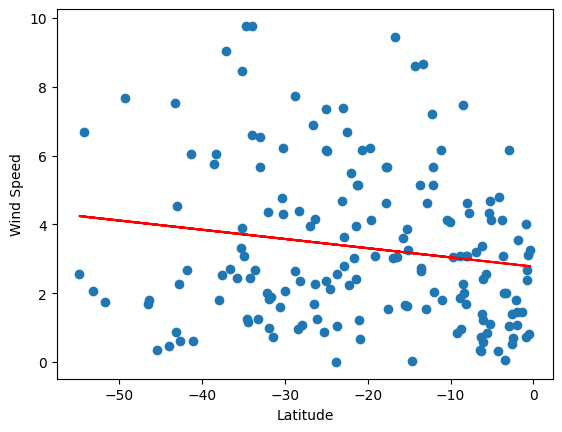

In [51]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE